In [5]:
import pandas as pd
import numpy as np

subpath = "naive_periodic_experiment/2025-01-06T19:07:27"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv')


In [6]:
data.drop(columns=['Unnamed: 6'], inplace=True)

In [7]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [8]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [9]:
group

,período,mean,std
0,2,11.0,2.0
1,4,12.0,2.0
2,8,12.0,2.0
3,16,11.0,2.0
4,32,12.0,3.0
5,64,11.0,3.0
6,128,11.0,2.0
7,256,11.0,5.0


In [10]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [11]:
total_table.set_index('período', inplace=True)

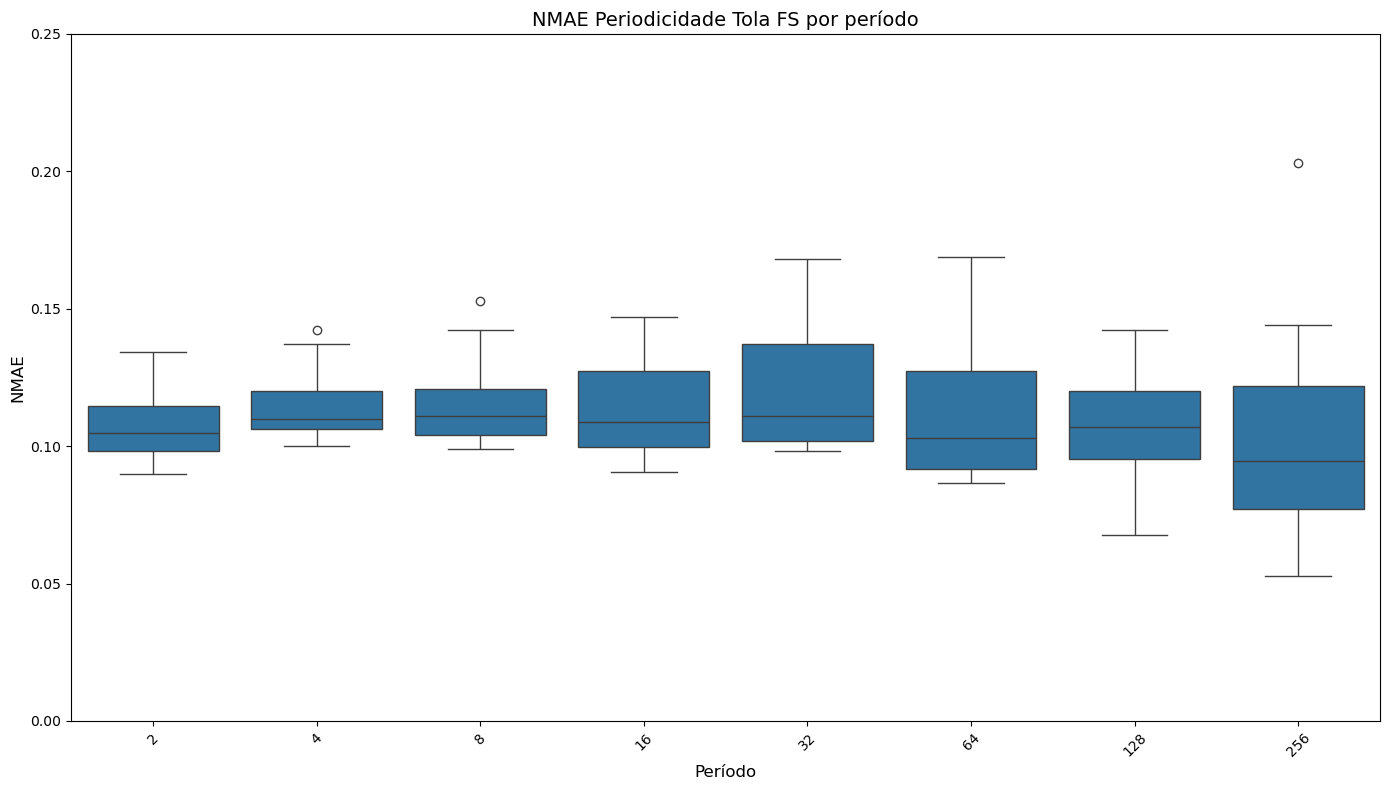

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_limits = (0, 0.25)

plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Periodicidade Tola FS por período", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(y_limits)

plt.show()

In [13]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [14]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [15]:
group_by_method

,período,método,mean,std
0,2,RF,11.0,2.0
1,2,RT,11.0,2.0
2,4,RF,11.0,2.0
3,4,RT,12.0,2.0
4,8,RF,11.0,2.0
5,8,RT,12.0,2.0
6,16,RF,11.0,2.0
7,16,RT,11.0,2.0
8,32,RF,12.0,3.0
9,32,RT,13.0,3.0


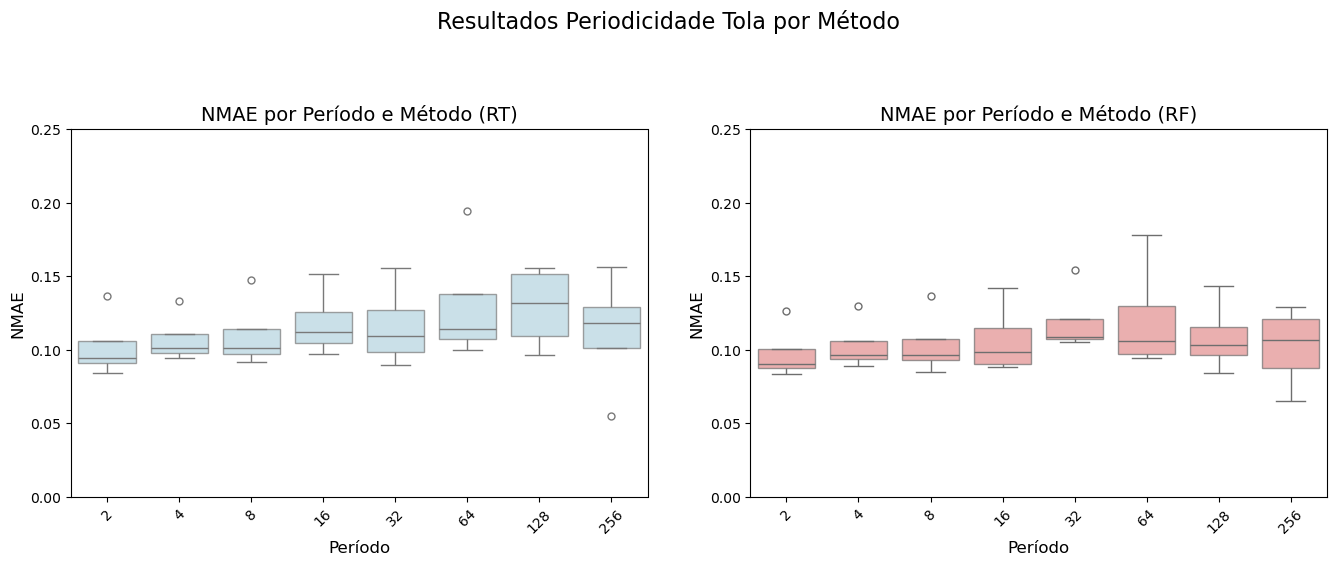

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados Periodicidade Tola por Método", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
